In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data

https://github.com/ishaghodgaonkar/emrbots/blob/master/100-Patients.zip

unzip it into the Data folder

In [8]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt

In [9]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)
admiss_core = pd.read_csv("C:/Users/Jon/BIOS6644_Spring_2024/Modules/Module_1/assignments/100_patients/AdmissionsCorePopulatedTable.txt",sep="\t",index_col="PatientID")
admiss_diag_core = pd.read_csv("C:/Users/Jon/BIOS6644_Spring_2024/Modules/Module_1/assignments/100_patients/AdmissionsDiagnosesCorePopulatedTable.txt",sep="\t",index_col="PatientID")
patient_core = pd.read_csv("C:/Users/Jon/BIOS6644_Spring_2024/Modules/Module_1/assignments/100_patients/PatientCorePopulatedTable.txt",sep="\t",index_col="PatientID")
labs_core = pd.read_csv("C:/Users/Jon/BIOS6644_Spring_2024/Modules/Module_1/assignments/100_patients/LabsCorePopulatedTable.txt",sep="\t",index_col="PatientID")

In [12]:
# 1) 
admiss_core, 
patient_core
labs_core

,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,URINALYSIS: RED BLOOD CELLS,1.8,rbc/hpf,1992-07-01 01:36:17.910
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: GLUCOSE,103.3,mg/dL,1992-06-30 09:35:52.383
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: MCH,35.8,pg,1992-06-30 03:50:11.777
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: CALCIUM,8.9,mg/dL,1992-06-30 12:09:46.107
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1992-07-01 01:31:08.677
...,...,...,...,...,...
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: HEMOGLOBIN,13.6,gm/dl,2012-04-21 03:23:50.883
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: MCH,26.2,pg,2012-04-21 03:18:44.127
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,METABOLIC: CHLORIDE,104.4,mmol/L,2012-04-21 02:58:57.840


In [21]:
# Dates!

In [14]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type
def convert_cols_to_datetime(df):
    for col in df:
        if "date" in col.lower() and type(df[col]) is not np.dtype('datetime64[ns]'):
            df[col] = pd.to_datetime(df[col])
  

In [16]:

# 1) 
convert_cols_to_datetime(admiss_core)
convert_cols_to_datetime(admiss_diag_core)
convert_cols_to_datetime(patient_core)
convert_cols_to_datetime(labs_core)

In [18]:
admiss_core.iloc[3]['AdmissionEndDate']-admiss_core.iloc[3]['AdmissionStartDate']

Timedelta('5 days 10:14:56.766000')

In [20]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# 7A025E77-7832-4F53-B9A7-09A3F98AC17E	
pid='7A025E77-7832-4F53-B9A7-09A3F98AC17E'
admiss_core.loc[admiss_core.index==pid]
admiss_diag_core.loc[admiss_diag_core.index==pid]
patient_core.loc[patient_core.index==pid]
labs_core.loc[labs_core.index==pid]
#admiss_core


,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CARBON DIOXIDE,20.9,mmol/L,1978-06-29 22:56:25.430
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: BILI TOTAL,0.3,mg/dL,1978-06-30 00:55:28.273
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CALCIUM,7.4,mg/dL,1978-06-30 07:11:48.760
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: NEUTROPHILS,2.8,k/cumm,1978-06-30 00:01:24.477
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: MCHC,32.2,g/dl,1978-06-30 04:33:20.790
...,...,...,...,...,...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,METABOLIC: ALT/SGPT,65.9,U/L,2011-10-21 22:37:12.087
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: HEMOGLOBIN,11.6,gm/dl,2011-10-22 00:25:12.860
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: RDW,14.7,%,2011-10-21 21:29:42.703


In [22]:
labs_core.loc[labs_core.index==pid]


,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CARBON DIOXIDE,20.9,mmol/L,1978-06-29 22:56:25.430
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: BILI TOTAL,0.3,mg/dL,1978-06-30 00:55:28.273
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CALCIUM,7.4,mg/dL,1978-06-30 07:11:48.760
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: NEUTROPHILS,2.8,k/cumm,1978-06-30 00:01:24.477
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: MCHC,32.2,g/dl,1978-06-30 04:33:20.790
...,...,...,...,...,...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,METABOLIC: ALT/SGPT,65.9,U/L,2011-10-21 22:37:12.087
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: HEMOGLOBIN,11.6,gm/dl,2011-10-22 00:25:12.860
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: RDW,14.7,%,2011-10-21 21:29:42.703


In [24]:
# SQL-like joins
jdf =  patient_core.join(labs_core, how='left')


In [26]:
jdf.shape, patient_core.shape, labs_core.shape

((111483, 11), (100, 6), (111483, 5))

In [28]:
# Holy cow!  this patient has lots of lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#print("Stats on Number of Labs per Patient")
#print(...)

labvisits = jdf.groupby('PatientID').count()
#print(labvisits)
#cool we still have 100 patients

#groupoing by ID and addign count sets all columns to the umber if times the ID comes up, all the same so no missing inputs
#found the option to describe
labvisits[["AdmissionID"]].describe()
#since the count option is in the groupby, any column but patient ID would return these results
# mean is higher than 50% suggesting the max patient visits is likely abnormally high but not a data error





,AdmissionID
count,100.00000
mean,1114.83000
std,539.36152
min,86.00000
25%,706.25000
50%,1032.50000
75%,1441.25000
max,2760.00000


In [48]:
#   2) Compute a list of each lab and how many orders for that lab are in the data frame
#    

#laborders = jdf.groupby('LabName').count()
#.count()
#print(laborders)
#Prints a list of numbers of entries for each test, usually around 3,300 counts

#Pieces of other ideas
#df1 = laborders[['LabName']]
#.rename(columns={"LabName": "Lab Name", "AdmissionID": "Order Count"})
#df.rename(columns={"A": "a", "B": "c"})
#print(LabCount)

#WWJKD
for tc in jdf.index.unique():
    # start a for loop on a given variable (changed pp to make sure its jsut a name) on a unique index of the datafile jdf
    sjdf = jdf.loc[jdf.index==tc]
    # sjdf might stand for second jdf made from  the column index made in the for loop 
    #sjdf.columns
    # what's this for? Commenting out doesnt change output, lets run without it and see what happens
    

In [44]:
#lets look at it without value counts for labname
print(sjdf)
# we definately need the value counts

                                     PatientGender      PatientDateOfBirth  \
PatientID                                                                    
FFCDECD6-4048-4DCB-B910-1218160005B3          Male 1941-05-06 14:56:42.687   
FFCDECD6-4048-4DCB-B910-1218160005B3          Male 1941-05-06 14:56:42.687   
FFCDECD6-4048-4DCB-B910-1218160005B3          Male 1941-05-06 14:56:42.687   
FFCDECD6-4048-4DCB-B910-1218160005B3          Male 1941-05-06 14:56:42.687   
FFCDECD6-4048-4DCB-B910-1218160005B3          Male 1941-05-06 14:56:42.687   
...                                            ...                     ...   
FFCDECD6-4048-4DCB-B910-1218160005B3          Male 1941-05-06 14:56:42.687   
FFCDECD6-4048-4DCB-B910-1218160005B3          Male 1941-05-06 14:56:42.687   
FFCDECD6-4048-4DCB-B910-1218160005B3          Male 1941-05-06 14:56:42.687   
FFCDECD6-4048-4DCB-B910-1218160005B3          Male 1941-05-06 14:56:42.687   
FFCDECD6-4048-4DCB-B910-1218160005B3          Male 1941-05-06 14

In [50]:
sjdf.LabName.value_counts()

LabName
CBC: MEAN CORPUSCULAR VOLUME     37
METABOLIC: BILI TOTAL            37
CBC: WHITE BLOOD CELL COUNT      35
CBC: LYMPHOCYTES                 35
METABOLIC: TOTAL PROTEIN         35
CBC: MCHC                        35
URINALYSIS: WHITE BLOOD CELLS    35
METABOLIC: BUN                   35
CBC: NEUTROPHILS                 34
METABOLIC: POTASSIUM             34
METABOLIC: ANION GAP             34
URINALYSIS: SPECIFIC GRAVITY     34
METABOLIC: ALBUMIN               34
METABOLIC: CARBON DIOXIDE        34
CBC: ABSOLUTE NEUTROPHILS        33
CBC: RED BLOOD CELL COUNT        33
METABOLIC: CREATININE            33
CBC: RDW                         33
CBC: ABSOLUTE LYMPHOCYTES        33
CBC: MONOCYTES                   32
METABOLIC: SODIUM                32
CBC: EOSINOPHILS                 32
URINALYSIS: RED BLOOD CELLS      31
CBC: HEMATOCRIT                  31
METABOLIC: CHLORIDE              31
METABOLIC: CALCIUM               31
URINALYSIS: PH                   30
METABOLIC: GLUCOSE  

In [89]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken

# patient - lab combo
# Unique Patient AND Unique Lab
#Frequency or count of labName by patient ID

#Dummy Variables?
#from a machine learning tutorial site
#dummy = pd.get_dummies(jdf["LabName"])
#print first couple rows
#dummy .head()
# 1 column for each test True False for each lab for each visit
# step 2, count of trues for each column by patient

# dug a hole but found  asimpler soulution
#also should ahve read the whole problem
#    Hint:  you can "group by" multiple columns 


# Double Group, rename 1 column to count, remove redundant columns
labpop = jdf.groupby(['PatientID','LabName']).count().rename(columns={'PatientGender': 'Count'}).iloc[:, 0:2] 
print(labpop.sort_values(by='Count', ascending=False) )  

#at a count of 88
#Patient
#80D356B4-F974-441F-A5F2-F95986D119A2
#Test 
#CBC: HEMATOCRIT


#print(f"Patient with the most labs: {pt_most_labs}")

#   2) For the most-measured patient/lab combination, make a time vs lab-value plot


                                                                   Count  \
PatientID                            LabName                               
80D356B4-F974-441F-A5F2-F95986D119A2 CBC: HEMATOCRIT                  88   
                                     METABOLIC: ALT/SGPT              84   
                                     CBC: PLATELET COUNT              84   
                                     METABOLIC: POTASSIUM             84   
                                     CBC: MCHC                        83   
...                                                                  ...   
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B METABOLIC: BILI TOTAL             2   
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D CBC: HEMATOCRIT                   1   
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B CBC: LYMPHOCYTES                  1   
B7E9FC4C-5182-4A34-954E-CEF5FC07E96D URINALYSIS: SPECIFIC GRAVITY      1   
A50BE9B4-8A0B-4169-B894-F7BD86D7D90B METABOLIC: SODIUM                 1   

           

In [101]:
thebusypatient = '80D356B4-F974-441F-A5F2-F95986D119A2' # put patient ID here
thebusylab = 'CBC: HEMATOCRIT' #put the lab name here
subdf = jdf.loc[(jdf.index==thebusypatient) & (jdf.LabName.str.startswith(thebusylab))].sort_values(by='LabDateTime', ascending=True) 

In [103]:
print(subdf)

                                     PatientGender      PatientDateOfBirth  \
PatientID                                                                    
80D356B4-F974-441F-A5F2-F95986D119A2        Female 1938-03-06 18:24:18.297   
80D356B4-F974-441F-A5F2-F95986D119A2        Female 1938-03-06 18:24:18.297   
80D356B4-F974-441F-A5F2-F95986D119A2        Female 1938-03-06 18:24:18.297   
80D356B4-F974-441F-A5F2-F95986D119A2        Female 1938-03-06 18:24:18.297   
80D356B4-F974-441F-A5F2-F95986D119A2        Female 1938-03-06 18:24:18.297   
...                                            ...                     ...   
80D356B4-F974-441F-A5F2-F95986D119A2        Female 1938-03-06 18:24:18.297   
80D356B4-F974-441F-A5F2-F95986D119A2        Female 1938-03-06 18:24:18.297   
80D356B4-F974-441F-A5F2-F95986D119A2        Female 1938-03-06 18:24:18.297   
80D356B4-F974-441F-A5F2-F95986D119A2        Female 1938-03-06 18:24:18.297   
80D356B4-F974-441F-A5F2-F95986D119A2        Female 1938-03-06 18

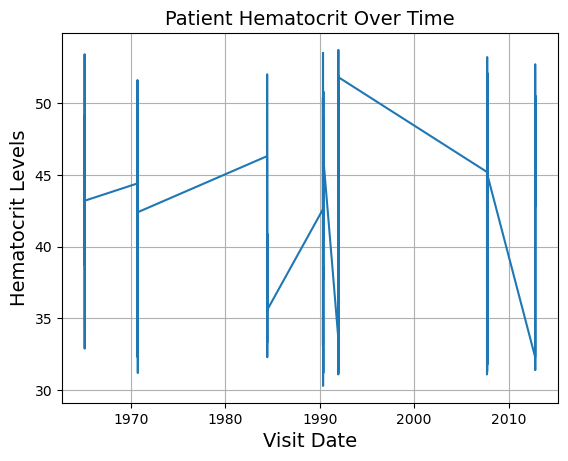

In [105]:
# 2) 
#%matplotlib widget
#dts = ...
#vls = ...

#plt.figure()
#plt.plot(dts, vls)


# found in dAta to Fish plotting tutorial

import matplotlib.pyplot as plt

plt.plot(subdf['LabDateTime'], subdf['LabValue'], )  #color='red', marker='o')
plt.title('Patient Hematocrit Over Time', fontsize=14)
plt.xlabel('Visit Date', fontsize=14)
plt.ylabel('Hematocrit Levels', fontsize=14)
plt.grid(True)
plt.show()

In [121]:
print(subdf[['LabValue', 'LabDateTime']].loc[(subdf['LabDateTime'] >= '1980-01-01') & (subdf['LabDateTime'] <= '1992-01-01'), 'LabDateTime'])


PatientID
80D356B4-F974-441F-A5F2-F95986D119A2   1984-06-01 09:30:14.280
80D356B4-F974-441F-A5F2-F95986D119A2   1984-06-02 21:34:40.797
80D356B4-F974-441F-A5F2-F95986D119A2   1984-06-04 05:55:34.237
80D356B4-F974-441F-A5F2-F95986D119A2   1984-06-05 06:32:31.843
80D356B4-F974-441F-A5F2-F95986D119A2   1984-06-06 02:27:07.433
80D356B4-F974-441F-A5F2-F95986D119A2   1984-06-06 22:20:08.173
80D356B4-F974-441F-A5F2-F95986D119A2   1984-06-09 17:19:39.513
80D356B4-F974-441F-A5F2-F95986D119A2   1984-06-10 11:12:51.680
80D356B4-F974-441F-A5F2-F95986D119A2   1984-06-10 22:19:50.850
80D356B4-F974-441F-A5F2-F95986D119A2   1990-05-03 15:06:03.977
80D356B4-F974-441F-A5F2-F95986D119A2   1990-05-04 14:28:10.857
80D356B4-F974-441F-A5F2-F95986D119A2   1990-05-05 07:23:53.927
80D356B4-F974-441F-A5F2-F95986D119A2   1990-05-06 22:37:55.173
80D356B4-F974-441F-A5F2-F95986D119A2   1990-05-07 11:52:15.477
80D356B4-F974-441F-A5F2-F95986D119A2   1990-05-08 22:35:45.447
80D356B4-F974-441F-A5F2-F95986D119A2   1990-0

In [266]:
##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?
#
# 2) How about the value for December 14, 1991?

<blockquote>The patient in question had no visits in 1985 but had the tests run routinely in June of 1984 and in may of 1990. In the cases of multiple tests on the same day, the values fluctuated wildy suggesting a procedure, treatmetn, or a drastic change in hydration. The same could be said of December of 1991. It would appear this patient only recieved this test in rapid succession durring hospital stays or around certian pivotal events. While both dates are within the patients time at this hospital system, using it to assess hematocrit on a given day when the data spans over 40 years would likely not be accurate. This is a relatively cheap test that can be run to assess blood health and is easily affected by hydration. It may be worth investigating if the full hematocrit range of aproximately 30-55 would be appropriate for a patient botn in 1938 who routinely visits the hospital. </blockquote>